In [5]:
import pandas as pd

csv_data=pd.read_csv('customers.csv')

excel_data=pd.read_excel('customers.xlsx',engine='openpyxl')

import json
with open ('customers.json','r') as json_file:
    json_data=pd.DataFrame(json.load(json_file))


print("csv data")
print(csv_data.head())
print("excel data")
print(excel_data.head())
print("json data")
print(json_data.head())

csv data
  first_name last_name                               email   
0     Joseph      Rice      josephrice131@slingacademy.com  \
1       Gary     Moore       garymoore386@slingacademy.com   
2       John    Walker      johnwalker944@slingacademy.com   
3       Eric    Carter      ericcarter176@slingacademy.com   
4    William   Jackson  williamjackson427@slingacademy.com   

                  phone                                   address gender  age   
0  +1-800-040-3135x6208    91773 Miller Shoal\nDiaztown, FL 38841   male   43  \
1     221.945.4191x8872       6450 John Lodge\nTerriton, KY 95945   male   71   
2     388-142-4883x5370  27265 Murray Island\nKevinfort, PA 63231   male   44   
3         (451)259-5402                 USNS Knight\nFPO AA 76532   male   38   
4      625.626.9133x374   170 Jackson Loaf\nKristenland, AS 48876   male   58   

   registered  orders   spent       job                      hobbies   
0  2019-05-05       7  568.29    Artist               Playi


Task 2


In [16]:
csv_data.info()
csv_data.isnull().sum()

excel_data.info()
excel_data.isnull().sum()


json_data.info()
json_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  1000 non-null   object 
 1   last_name   1000 non-null   object 
 2   email       1000 non-null   object 
 3   phone       1000 non-null   object 
 4   address     1000 non-null   object 
 5   gender      1000 non-null   object 
 6   age         1000 non-null   int64  
 7   registered  1000 non-null   object 
 8   orders      1000 non-null   int64  
 9   spent       1000 non-null   float64
 10  job         1000 non-null   object 
 11  hobbies     1000 non-null   object 
 12  is_married  1000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 94.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   

first_name    0
last_name     0
email         0
phone         0
address       0
gender        0
age           0
registered    0
orders        0
spent         0
job           0
hobbies       0
is_married    0
dtype: int64

T3

In [19]:
csv_data.fillna(0,inplace=True)
csv_data.drop_duplicates(inplace=True)
#same for the rest two

T4 combination


In [26]:
cmn_df=pd.concat([csv_data,excel_data,json_data],ignore_index=True)

T5

In [32]:
if not all(csv_data.columns==excel_data.columns) or not all(csv_data.columns==json_data):
    print("COls are inconsistent")
else:
    cmn_df['Area_code']=cmn_df['phone'].str.extract(r'(\d+)')
    cmn_df['new_var']=cmn_df['orders']*cmn_df['spent']
print(cmn_df.head())

  first_name last_name                               email   
0     Joseph      Rice      josephrice131@slingacademy.com  \
1       Gary     Moore       garymoore386@slingacademy.com   
2       John    Walker      johnwalker944@slingacademy.com   
3       Eric    Carter      ericcarter176@slingacademy.com   
4    William   Jackson  williamjackson427@slingacademy.com   

                  phone                                   address gender  age   
0  +1-800-040-3135x6208    91773 Miller Shoal\nDiaztown, FL 38841   male   43  \
1     221.945.4191x8872       6450 John Lodge\nTerriton, KY 95945   male   71   
2     388-142-4883x5370  27265 Murray Island\nKevinfort, PA 63231   male   44   
3         (451)259-5402                 USNS Knight\nFPO AA 76532   male   38   
4      625.626.9133x374   170 Jackson Loaf\nKristenland, AS 48876   male   58   

   registered  orders   spent       job                      hobbies   
0  2019-05-05       7  568.29    Artist               Playing sports

In [38]:
stats=cmn_df.describe()

agg_data=cmn_df.groupby(cmn_df['job']).agg({'orders':'sum','spent':'mean'})


print("stats",stats)
print("agg_data",agg_data)


stats                age       orders        spent       new_var
count  3000.000000  3000.000000  3000.000000   3000.000000
mean     48.145000    10.036000   496.295100   4897.263710
std      18.346339     6.173606   289.132777   4466.151285
min      18.000000     0.000000     0.490000      0.000000
25%      32.000000     5.000000   248.100000   1284.262500
50%      47.000000    10.000000   469.045000   3628.140000
75%      64.000000    15.000000   739.660000   7375.115000
max      80.000000    20.000000   999.150000  19983.000000
agg_data                 orders       spent
job                               
Accountant        1008  480.695882
Architect          654  549.016667
Artist             591  576.194583
Athlete            906  503.059630
Baker              981  469.264194
Barber            1038  453.617143
Butcher            975  430.244687
Carpenter          471  521.049000
Cashier            831  541.296538
Chef              1050  501.610938
Clerk              762  486.912083

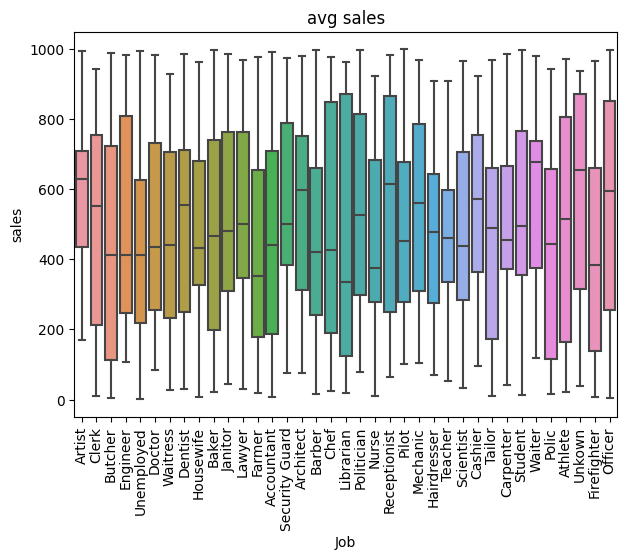

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(x='job',y='spent',data=cmn_df)
plt.xticks(rotation=90)
plt.title("avg sales")
plt.xlabel("Job")
plt.ylabel('sales')
plt.show()